In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
plt.rcParams["figure.autolayout"] = True

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

# Data

source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

This database contains 14 physical attributes based on Blood samples are taken from patients as well as from a brief exercise test. 

The target field is indicative of the presense of heart disease (0 for no presence, 1 for presence). 


The goal is to create a model tha can predict the likelihood of heart disease so that expensive and invasive procedures can be better targeted.


Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

In [3]:
df = pd.read_csv('heart.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Exploratory Data Analysis

First we check for any missing or NaN values, which there are not.

In [8]:
df.isnull().values.any()
df.isna().values.any()

False

False

Inspect standard statistics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Plot the target column which indicates heart disease

<AxesSubplot:xlabel='target', ylabel='count'>

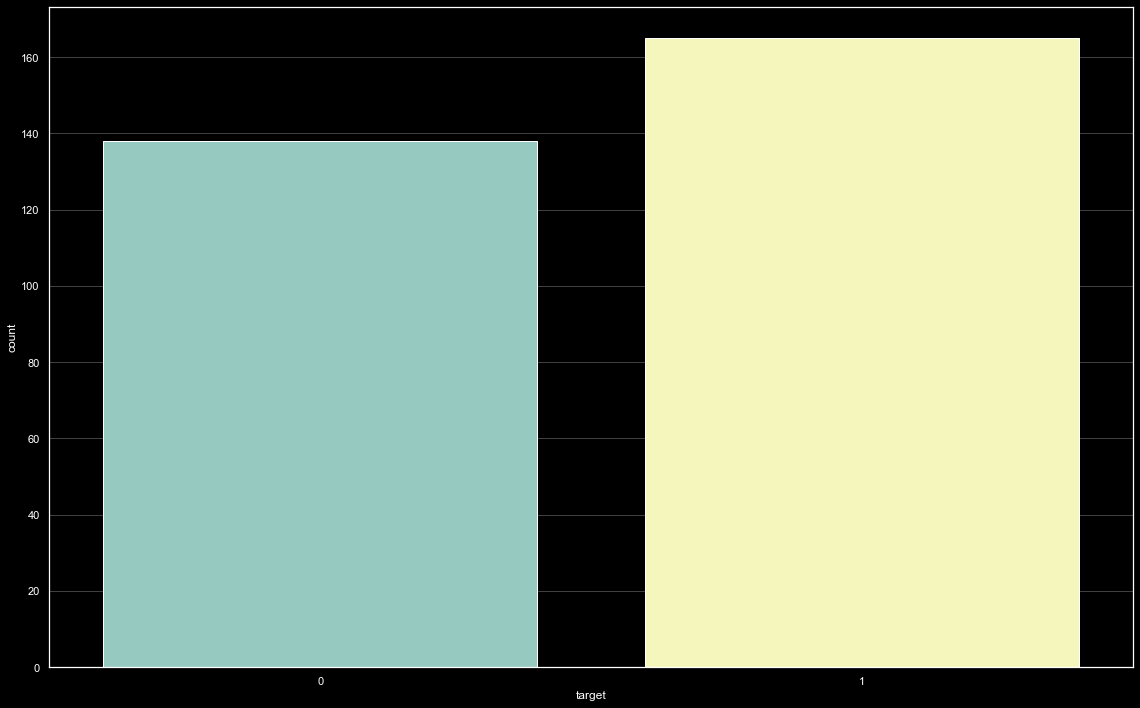

In [4]:
sns.countplot(x=df['target'])

We use a pairplot to display some of the popular columns

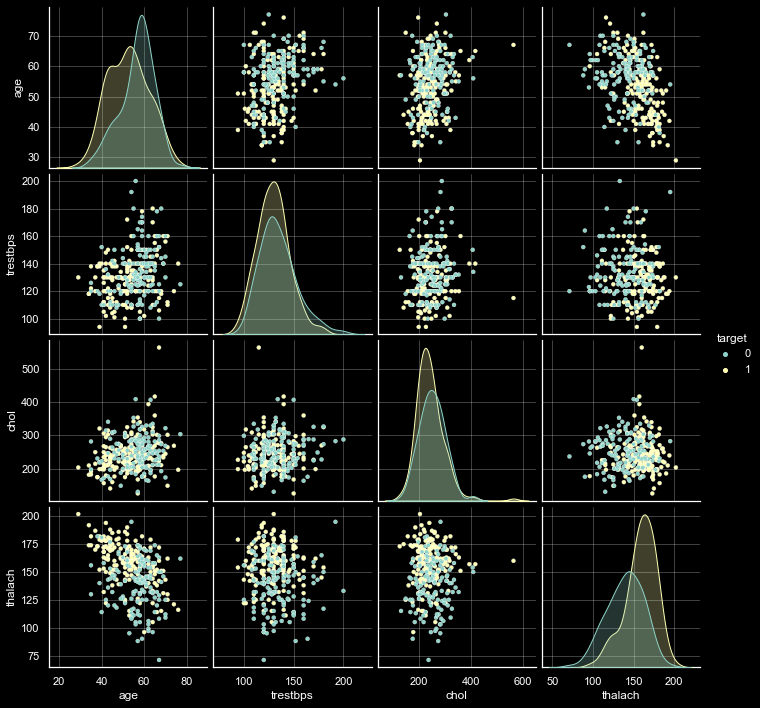

In [5]:
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']], hue='target')

We create a heatmap that displays the correlation between all features

<Figure size 2400x1600 with 0 Axes>

<AxesSubplot:>

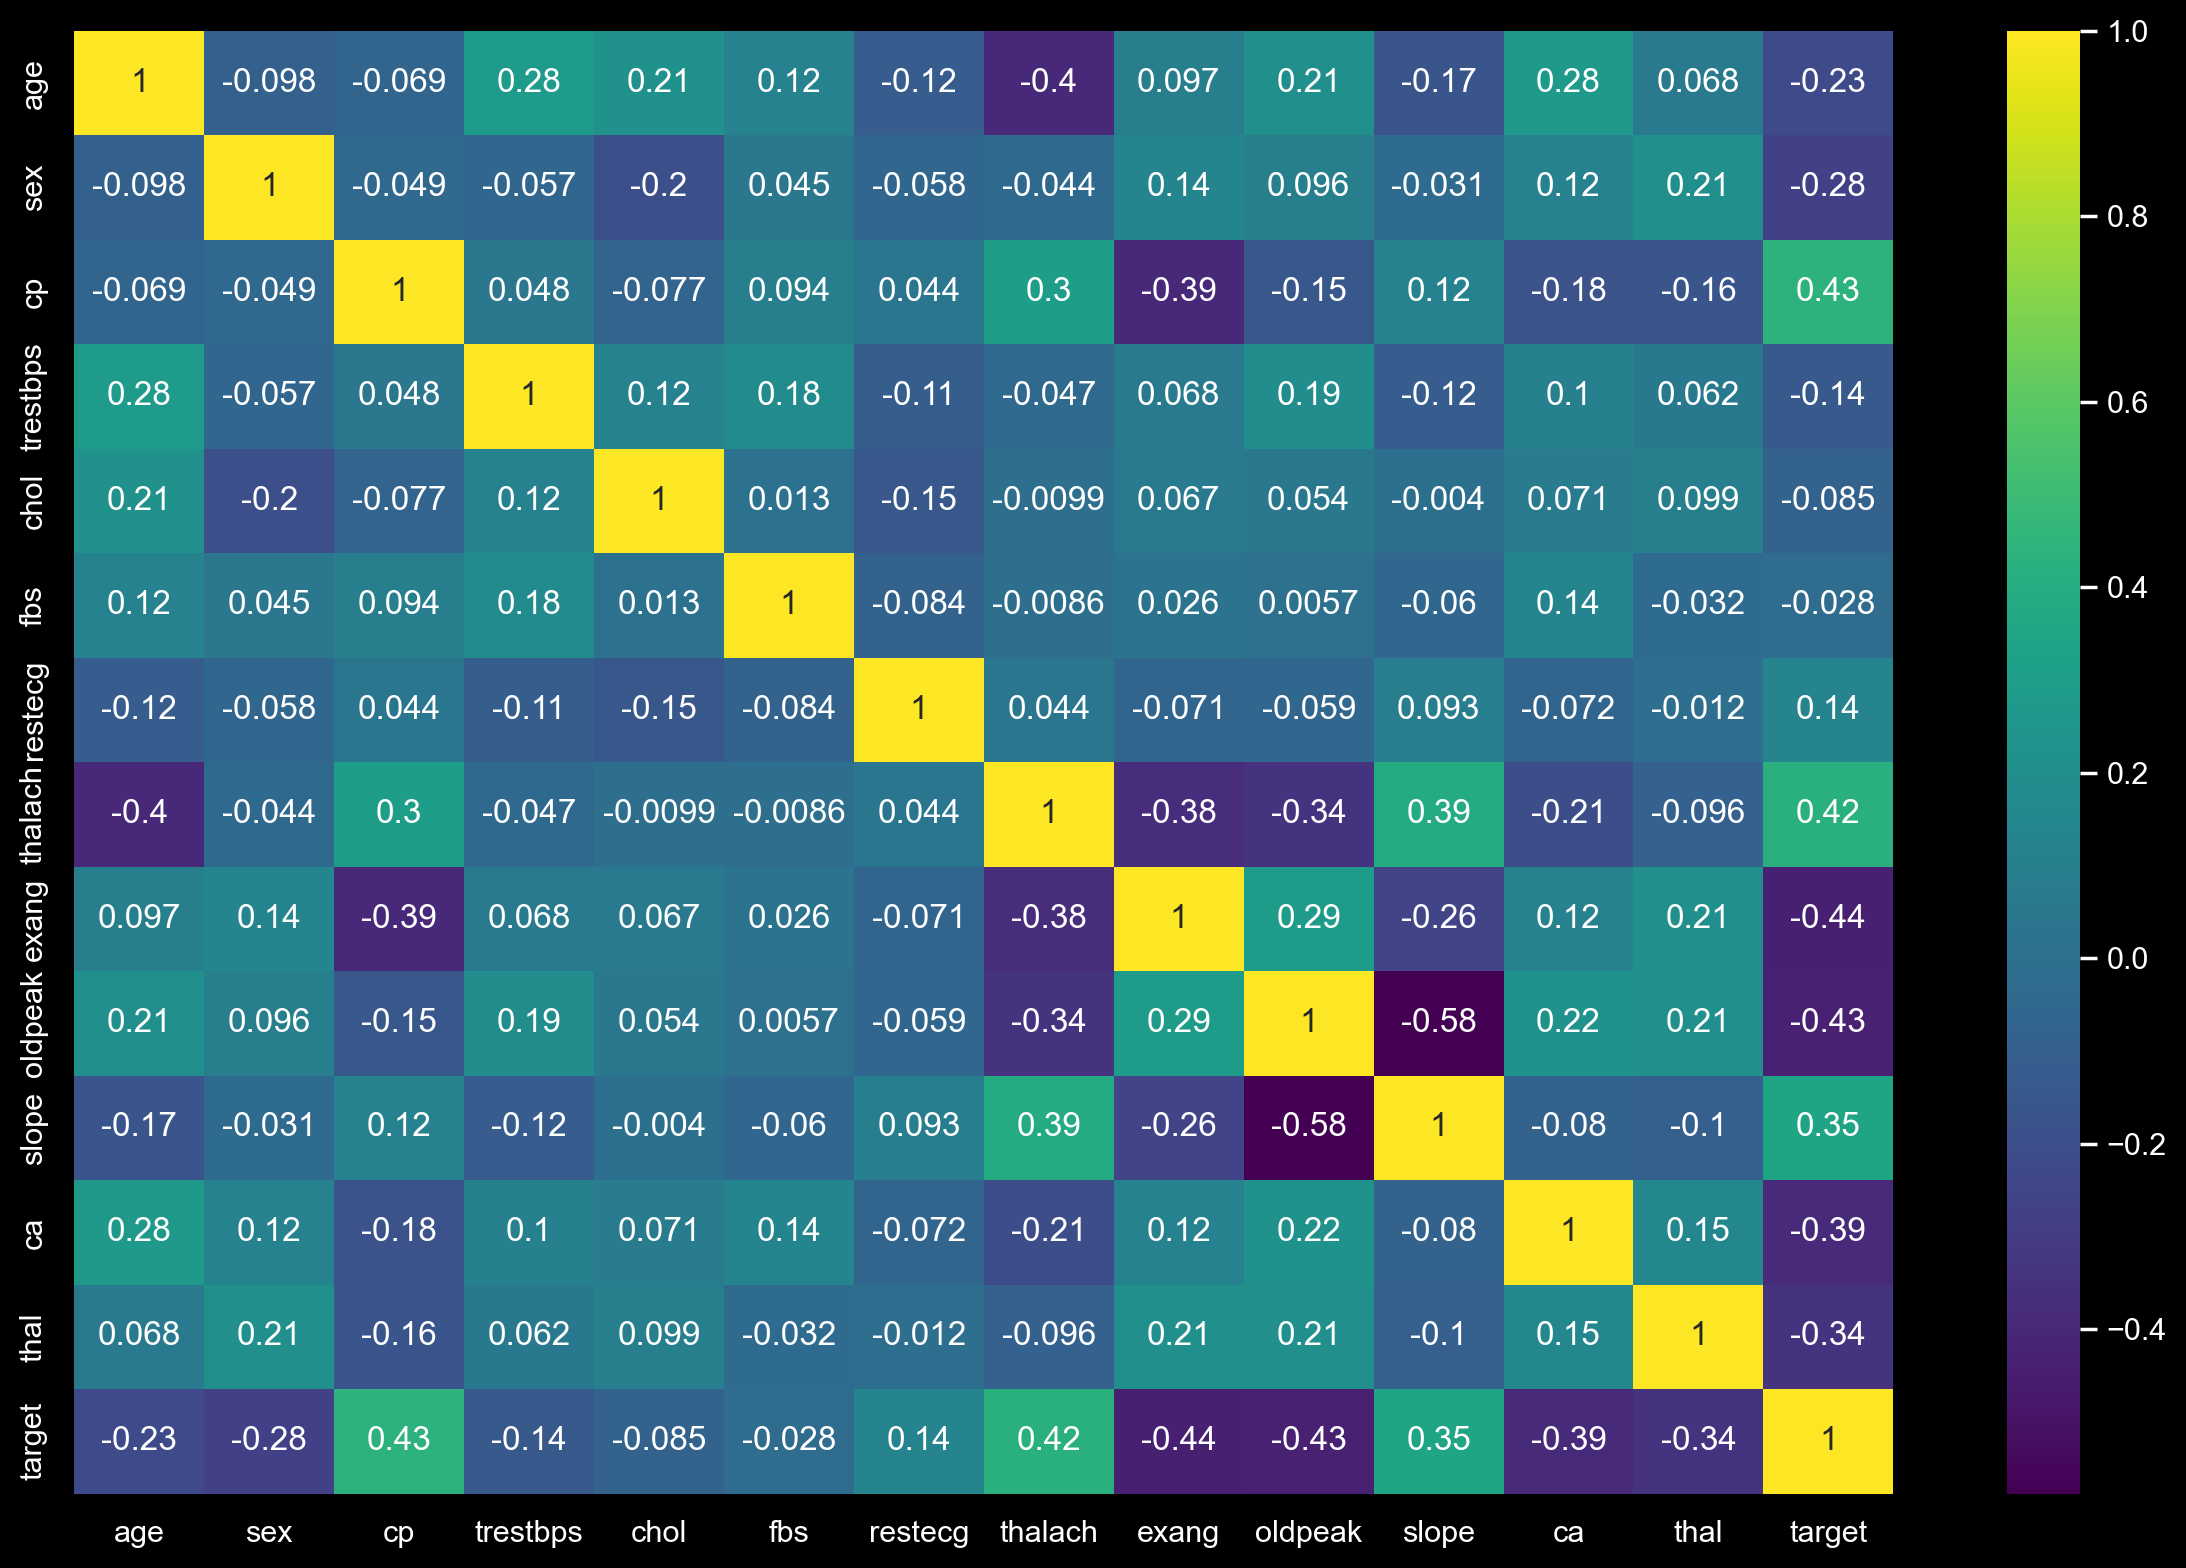

In [6]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

we see that target is quite correlated with cp, thalach and slope. 

# Machine Learning

## Preparation y, X

Define the our variables as y for the target, and as X for all other features

In [7]:
X = df.drop('target', axis=1)
y = df['target']

We then perform a train and split with 10% test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler

We scale further data by removing its mean and setting the deviation to 1.

This is achieved by using the standardized scaler

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)  

where we only fitted the train data in order to avoid data leakage.

## Model

In [13]:
log_model = LogisticRegressionCV()